# ATLAS AD TRIGGERS HLT STUDY: PHYSICS RUNS WITH REGIONS LABELS

**Author:** Claire  
**Date:** 2025-02-13 
**Goals:** 
- Data inspection (duplicates, MET, etc)
- Using ntuples from Max from Feb. 2025: EB_test and 5 regular physics runs
- No signal (so far)
- Plot distributions post HLT-AD trigger for objects  
- See the "physics" that the HLT-AD trigger is selecting

**Files:** Ntuples from Max with AD scores by region.  
Object pT should be rescaled to original values.

In [60]:
# %% [python]
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Custom modules
import utils.dataframes_loader as df_loader
import utils.data_inspector as di
import utils.plot_event_display as evt_disp
import utils.plot_violin as pviolin
import utils.plot_latent_space as pls

data_dir = '/Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores_raw_regions/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading data
Storing each dataset-tag (EB_test and regular physics runs) in a dataframe.

In [3]:
# To inspect all dictionaries:
#df_loader.inspect_h5_keys(data_dir, selected_tag="EB_test")

# Loading all datasets
dataframes = df_loader.load_dataframes_from_h5(data_dir)

Loaded physMain_474926GRLReal from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores_raw_regions/physMain_474926GRLReal.h5
Loaded mc23e_RS_G_hh_bbbb_AutoWidth_c10_M300 from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores_raw_regions/mc23e_RS_G_hh_bbbb_AutoWidth_c10_M300.h5
Loaded mc23e_ChiPlusChiMinus100_99_0p3ns from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores_raw_regions/mc23e_ChiPlusChiMinus100_99_0p3ns.h5
Loaded mc23e_HNLeemu from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores_raw_regions/mc23e_HNLeemu.h5
Loaded EB_test from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores_raw_regions/EB_test.h5
Loaded mc23e_ttbar_2lep from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores_raw_regions/mc23e_ttbar_2lep.h5
Loaded physMain_474448GRLReal from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores_raw

# Data inspection
Focusing on `EB_test` for now.

## $p_T$ ranges

In [85]:
di.print_tables_pt_ranges(dataframes, 'EB_test')


Jets pT ranges for EB_test (percentages)
----------------------------------------------------------------------------------------------------
Range            j0pt          j1pt          j2pt          j3pt          j4pt          j5pt          
----------------------------------------------------------------------------------------------------
pt = 0           0.2%          0.7%          1.9%          3.7%          6.3%          9.6%     
0 < pt < 50     96.1%         98.4%         98.0%         96.2%         93.7%         90.4%     
pt ≥ 50          3.7%          0.8%          0.1%          0.0%          0.0%          0.0%     
----------------------------------------------------------------------------------------------------

Leptons pT ranges for EB_test (percentages)
----------------------------------------------------------------------------------------------------
Range            e0pt          e1pt          e2pt          mu0pt         mu1pt         mu2pt         
--------------

Why so many events with negative MET?

## Event display (transverse plane)

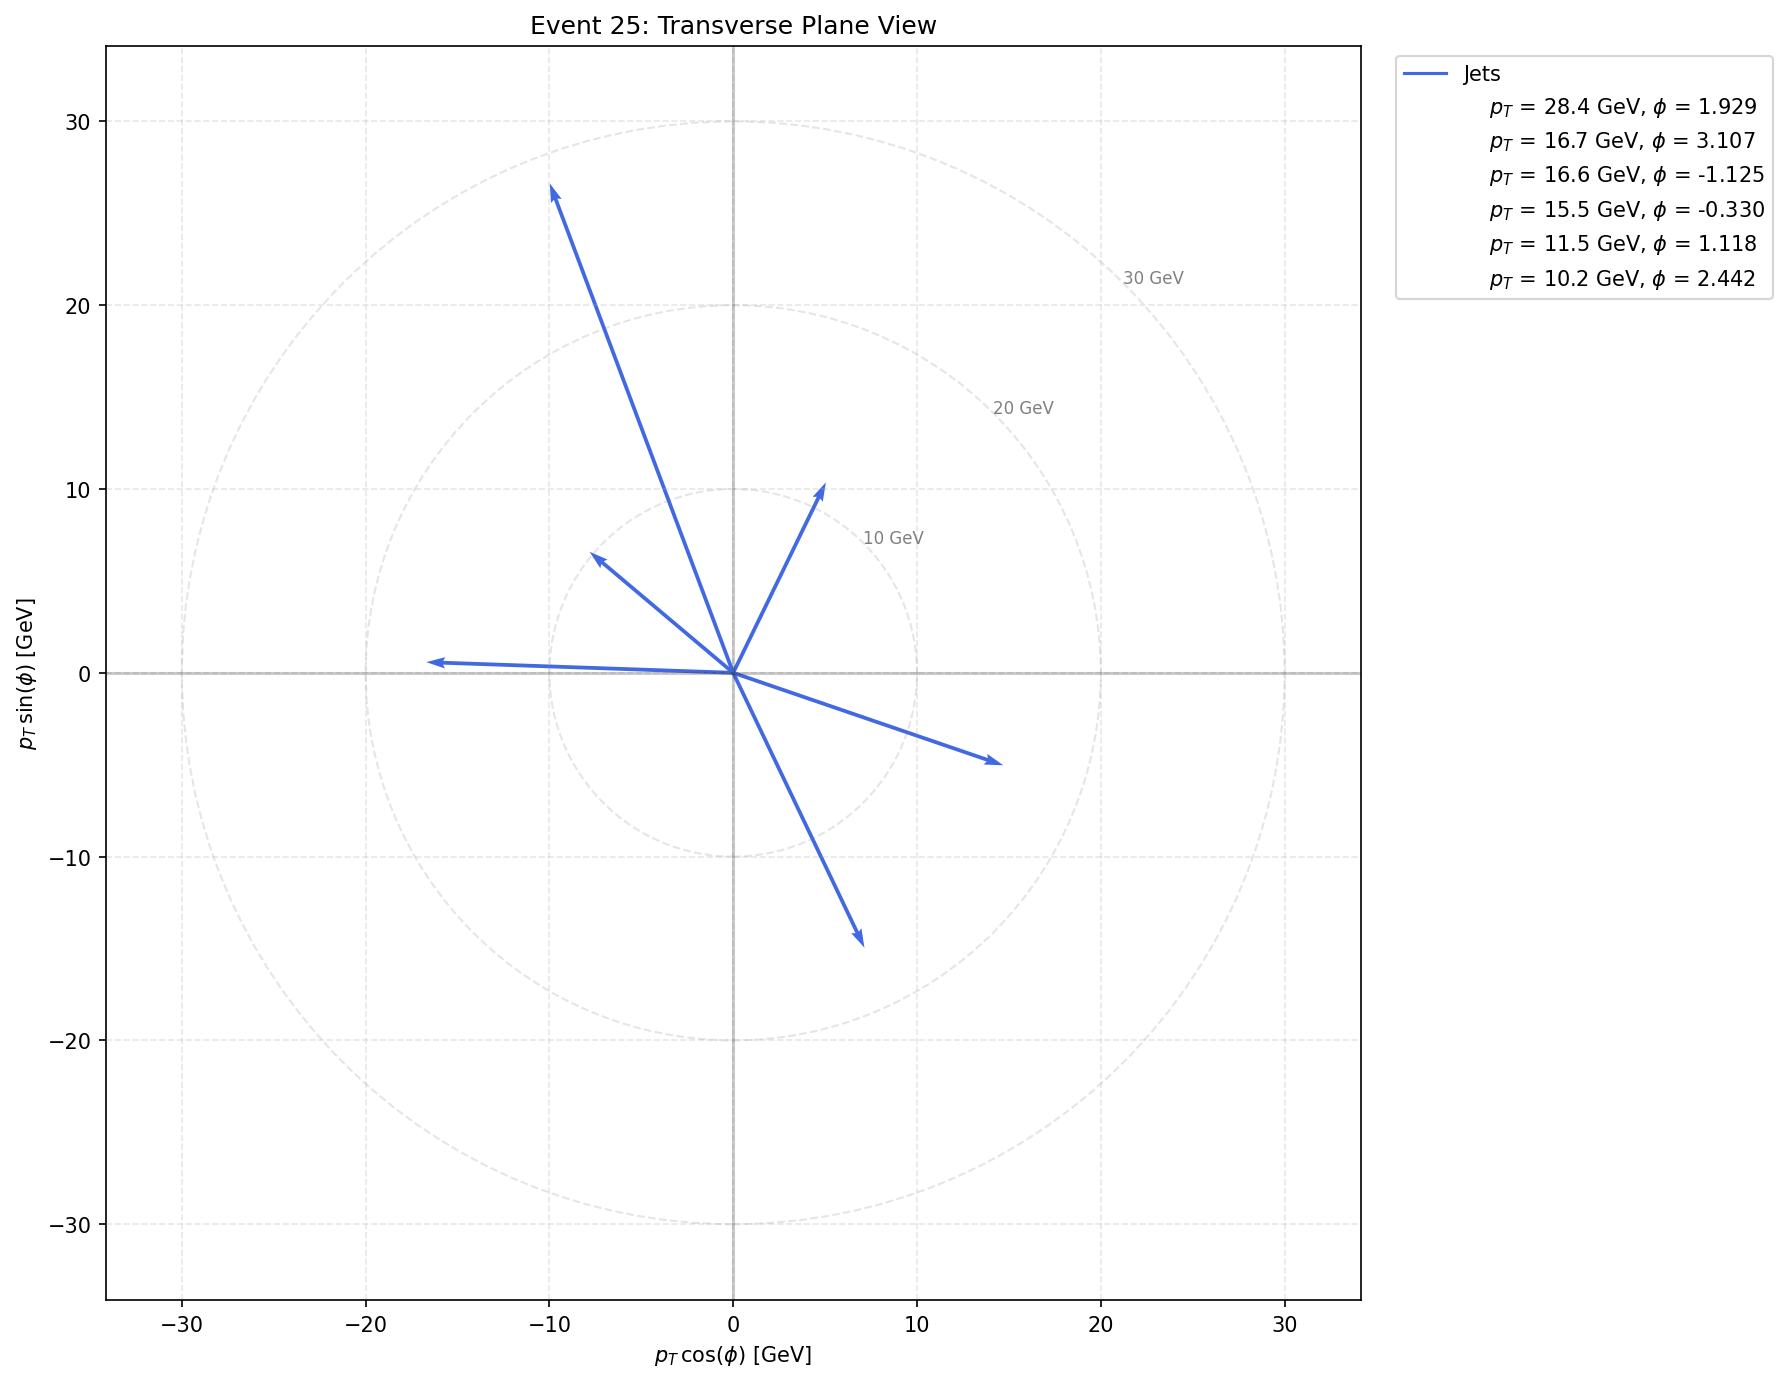

In [5]:
fig, ax = evt_disp.plot_event_2D(dataframes['EB_test'], event_idx=25)

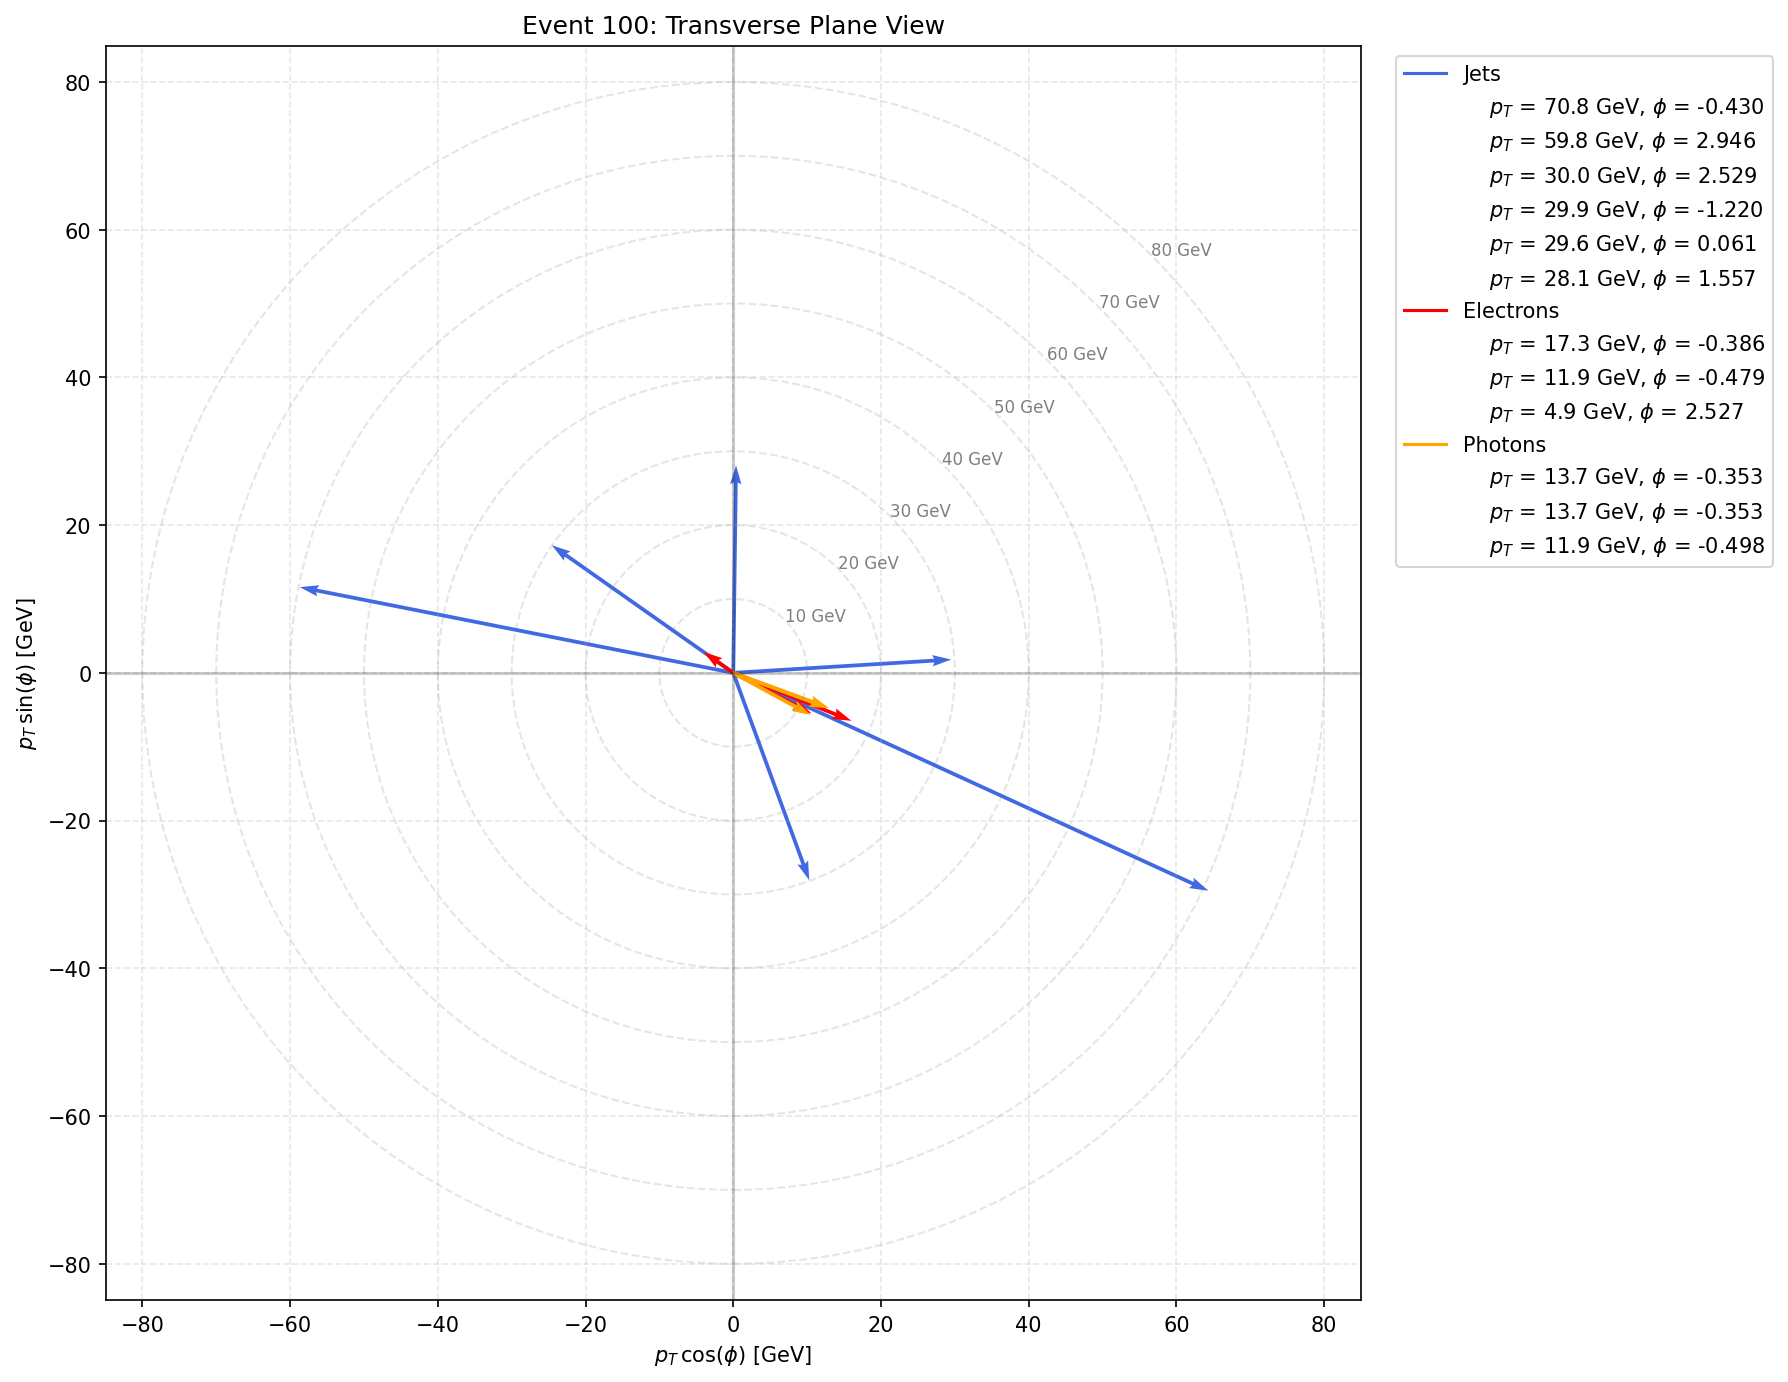

In [6]:
fig, ax = evt_disp.plot_event_2D(dataframes['EB_test'], event_idx=100)

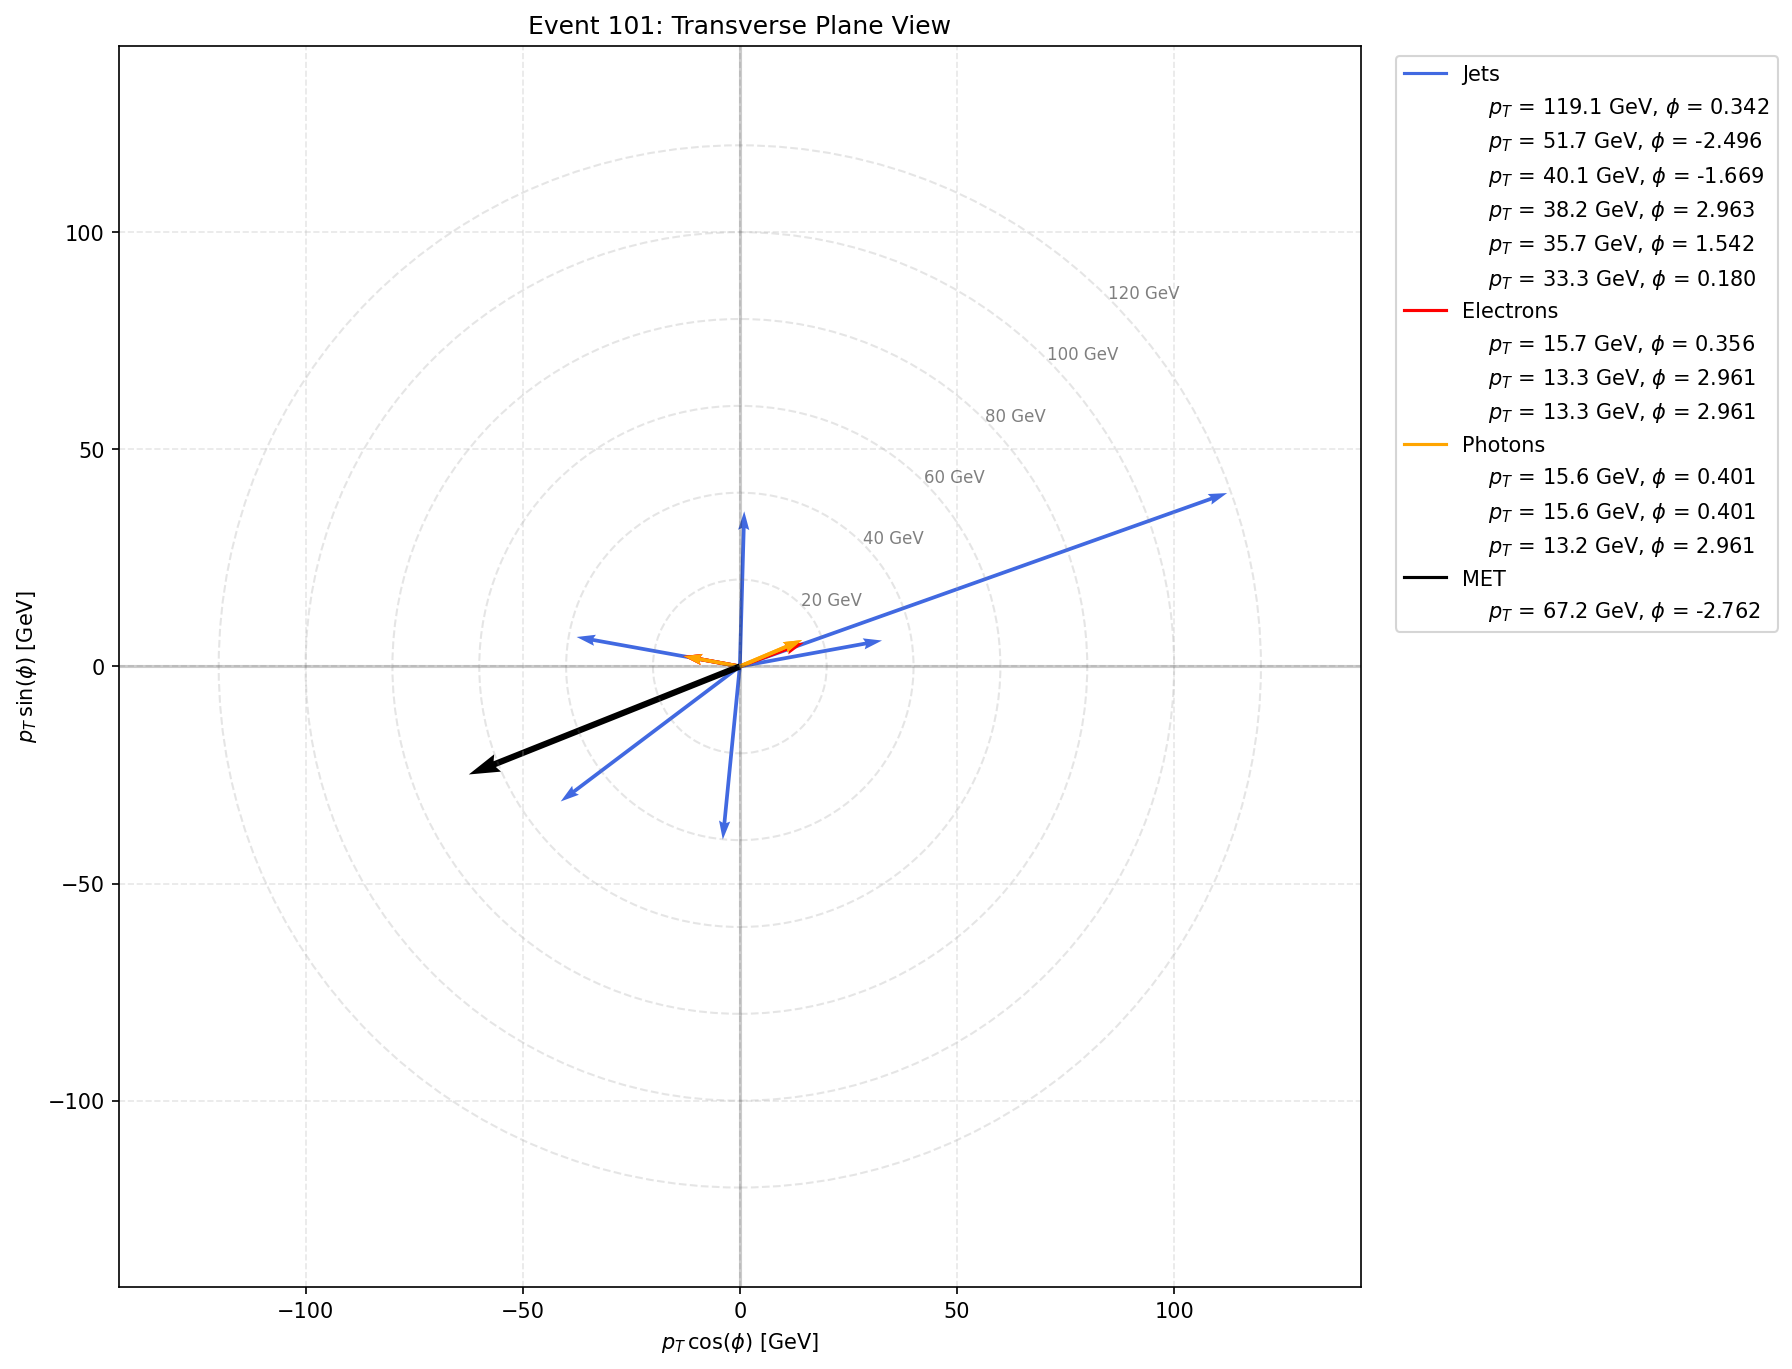

In [7]:
fig, ax = evt_disp.plot_event_2D(dataframes['EB_test'], event_idx=101)

## Duplicates
Checking how much duplicates events have.

In [86]:
di.inspect_duplicates_all_objects_fast(dataframes, 'EB_test')


Duplicate Inspection Table for EB_test
----------------------------------------------------------------------------------------------------
                                    Jets           Electrons               Muons             Photons
----------------------------------------------------------------------------------------------------
Number (raw)                     7871981             1764498              181931             2854186
Number (unique)                  7871951             1326737              181931             2117494
Number of duplicates                  30              437761                   0              736692
Reduction (%)                        0.0                24.8                 0.0                25.8
----------------------------------------------------------------------------------------------------


## AD scores across datasets

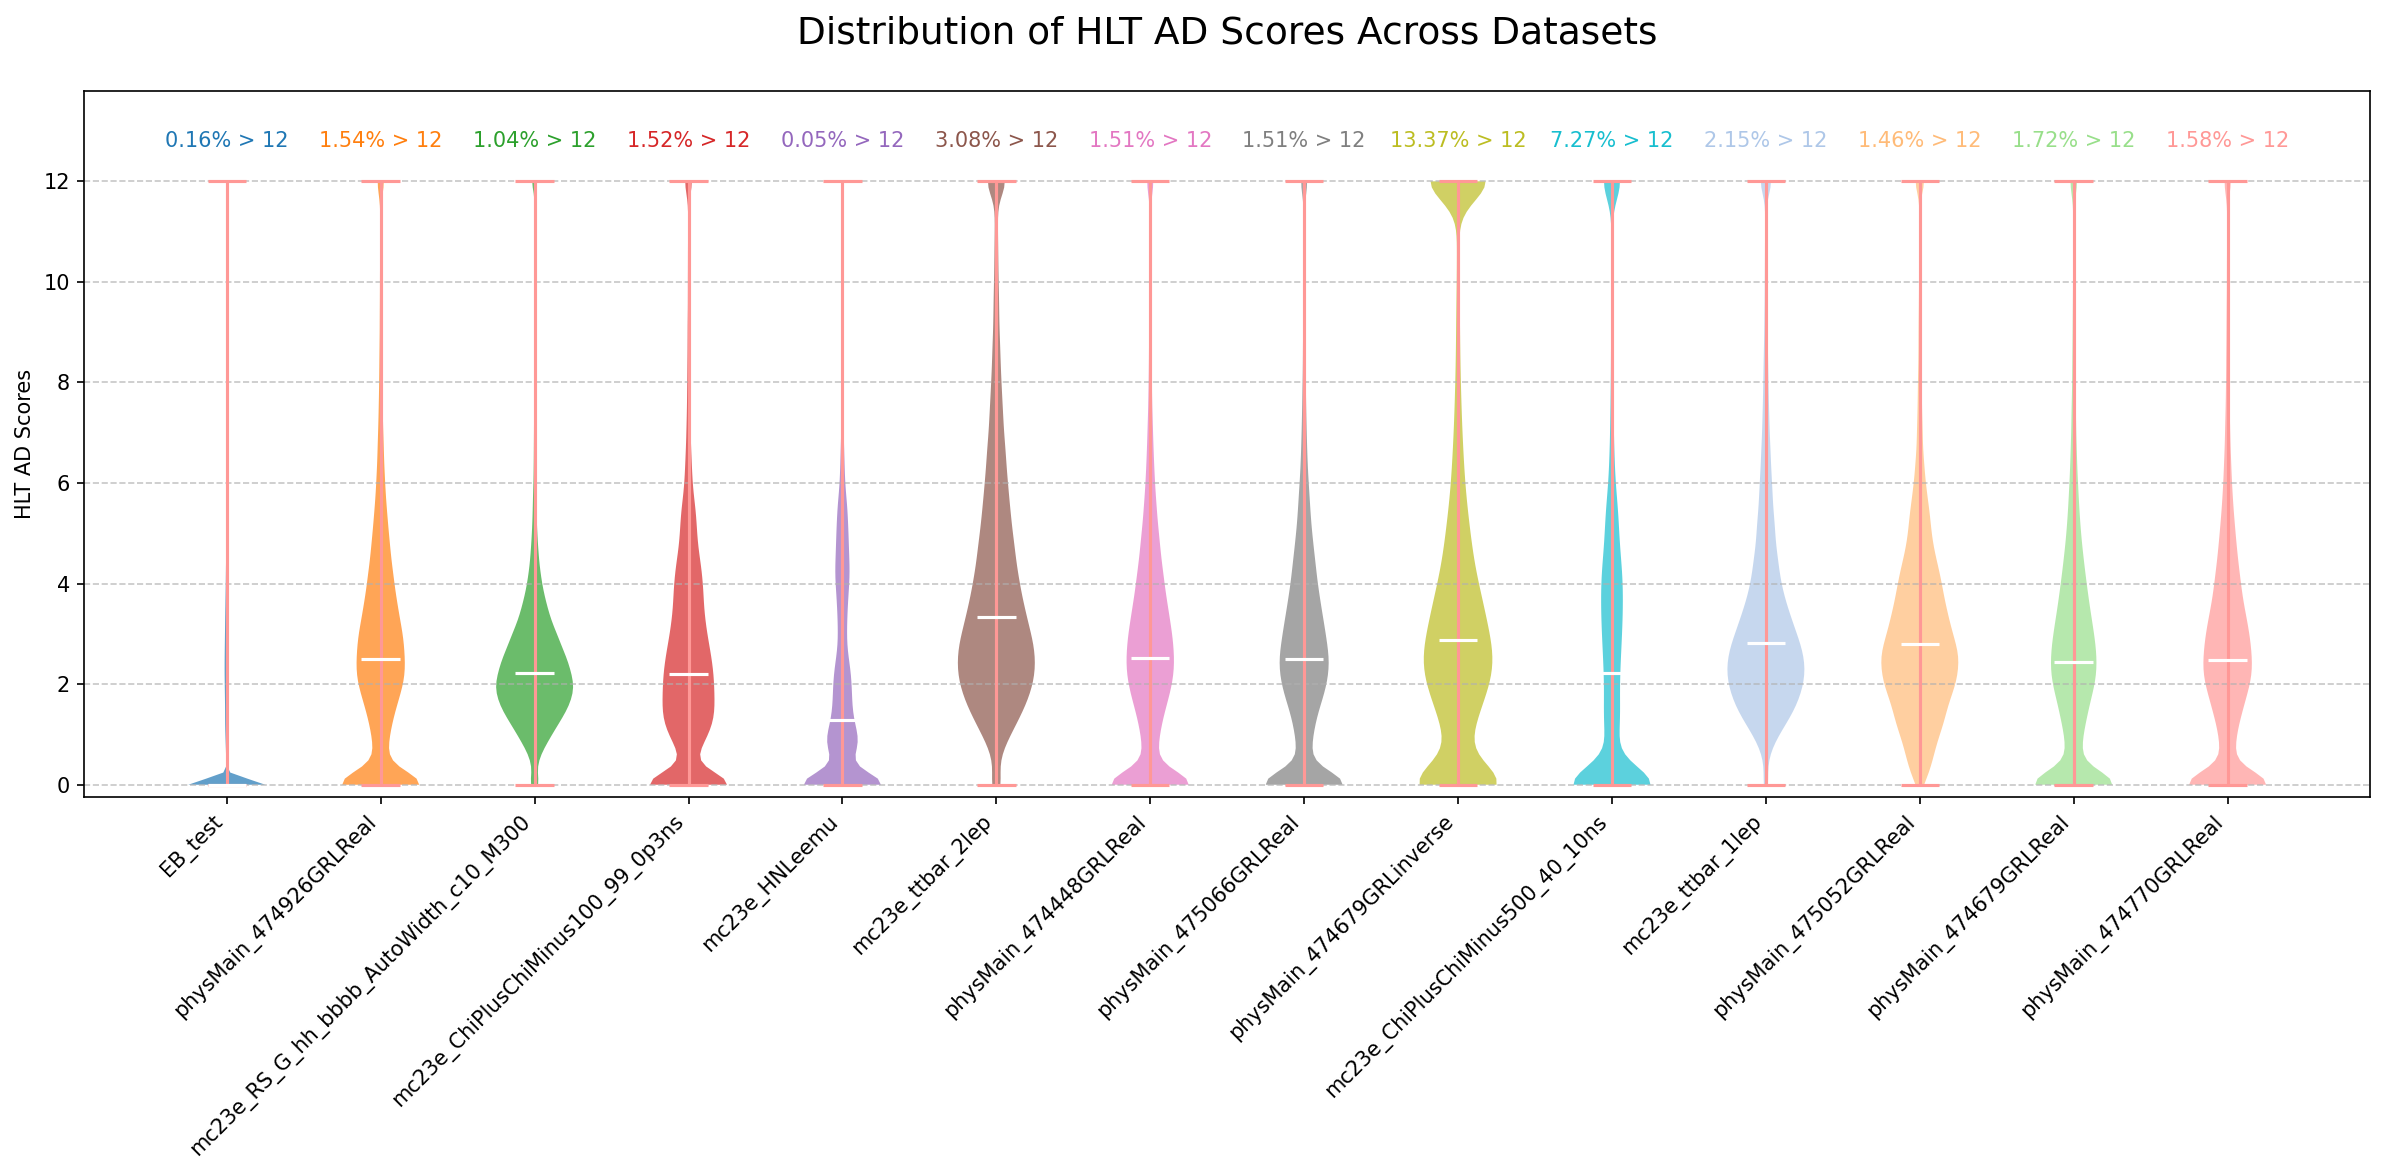

In [10]:
fig, ax = pviolin.plot_AD_scores_violin(dataframes, score_limit=12)

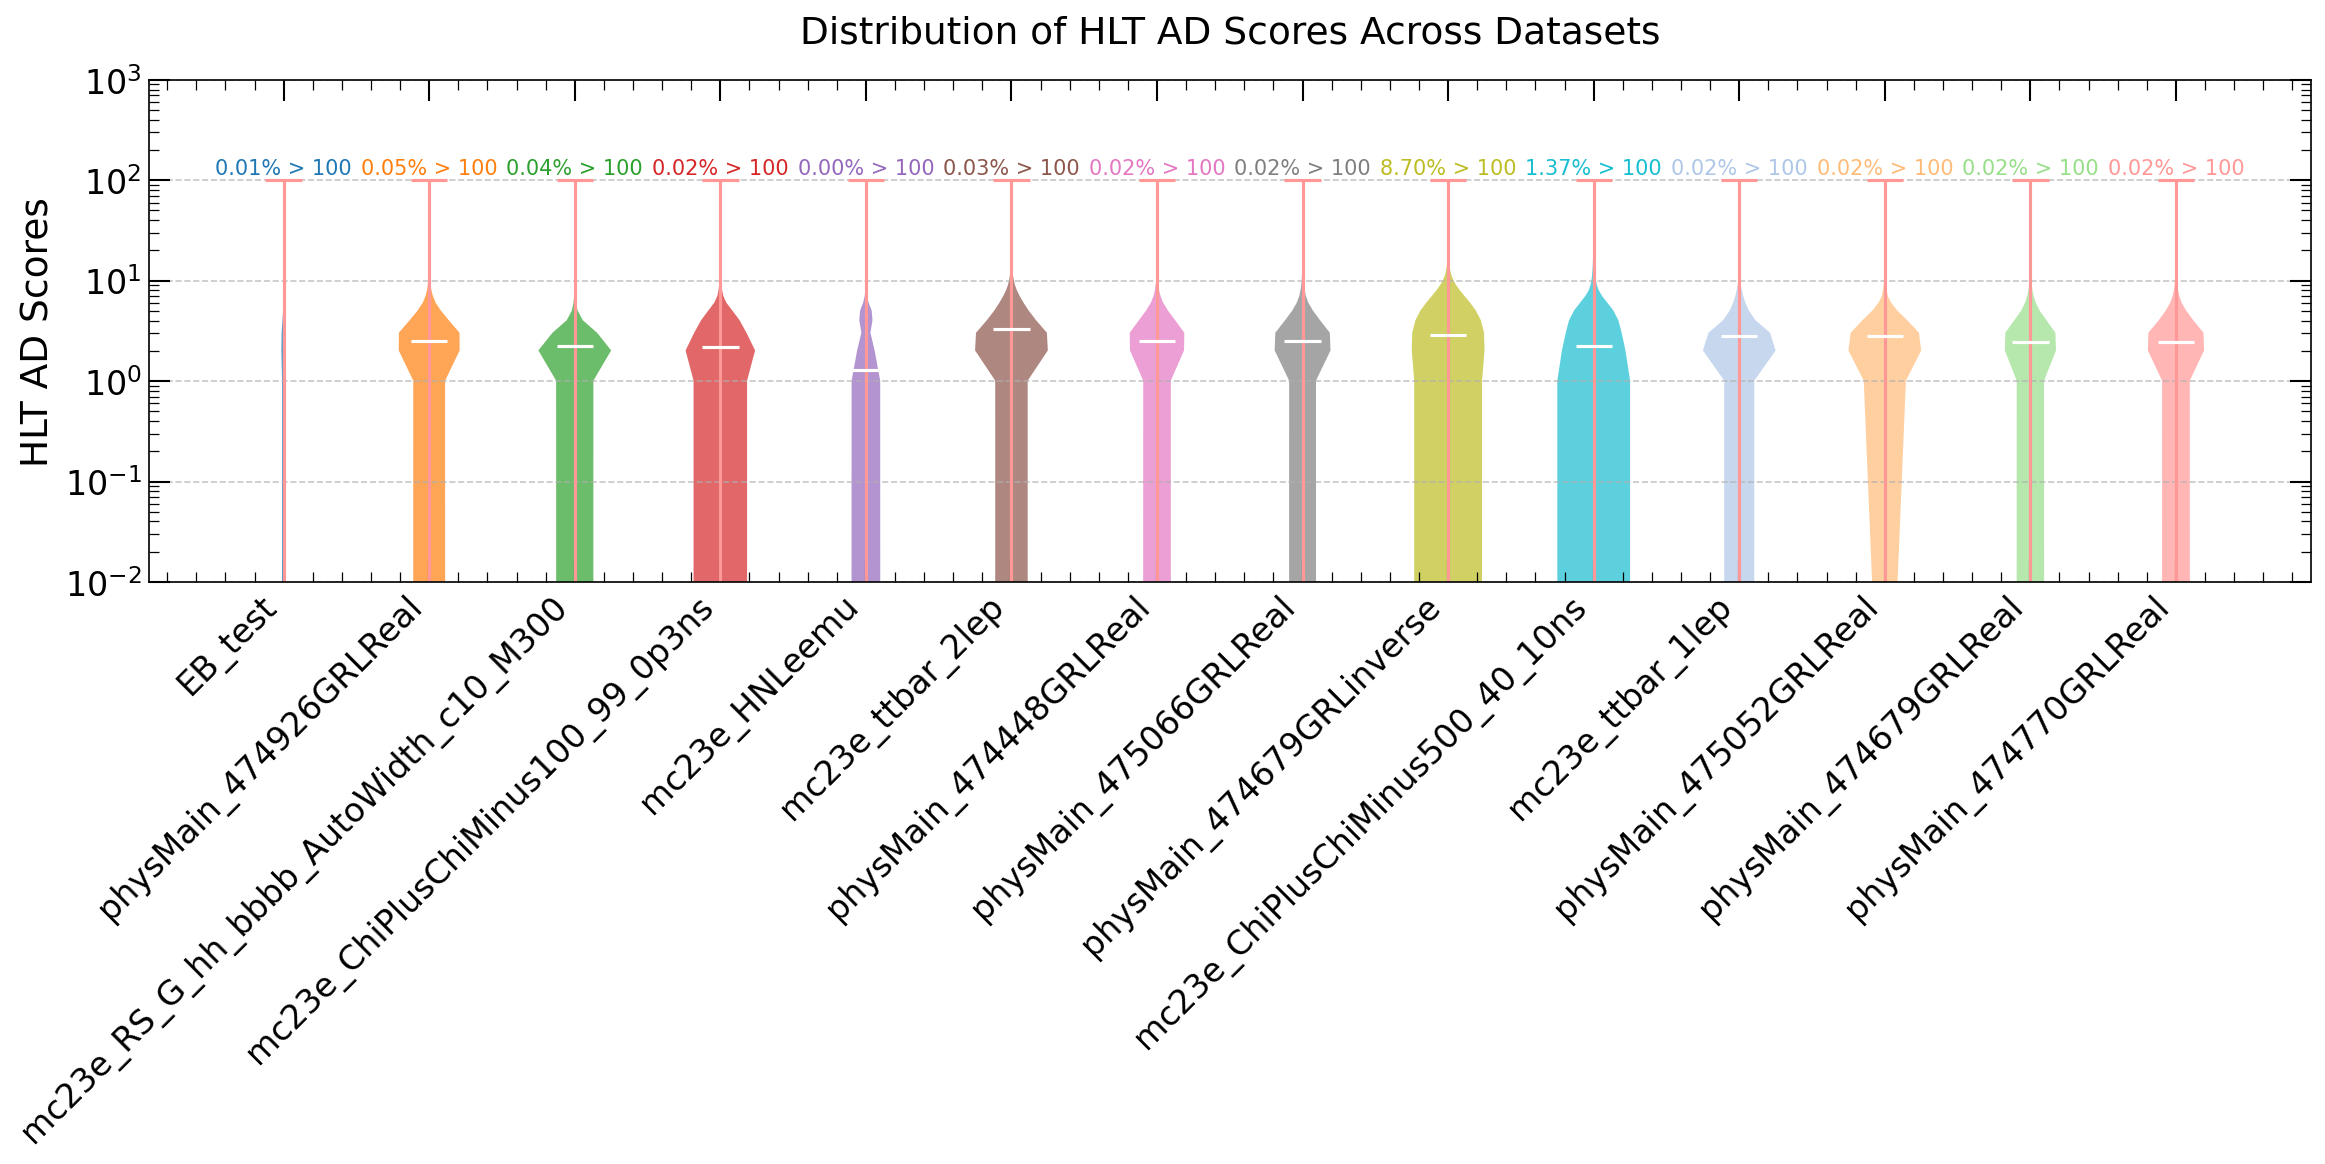

In [42]:
fig, ax = pviolin.plot_AD_scores_violin(dataframes, score_limit=100, ylog=True)

## Latent Space Exploration

Inspecting the distributions of LS1, LS2, LS3 and LS4 for the "standard" dataset `EB_test` and comparing with e.g. inverse GRL samples.

In [63]:
# EB_test
di.tables_latent_variables(dataframes, 'EB_test')


Descriptive Statistics for Latent Variables in EB_test
----------------------------------------------------------------------------------------------------
            LS1              LS2              LS3              LS4       
count        1,336,776        1,336,776        1,336,776        1,336,776
mean            0.1403           0.6180           1.8584           0.5946
std             0.0000           0.0000           8.6929           0.0000
min             0.1403           0.6180           1.2715           0.5946
25%             0.1403           0.6180           1.2734           0.5946
50%             0.1403           0.6180           1.2734           0.5946
75%             0.1403           0.6180           1.3905           0.5946
max             0.1403           0.6182        7385.0068           0.5946
----------------------------------------------------------------------------------------------------


In [65]:
# mc23e_RS_G_hh_bbbb_AutoWidth_c10_M300
di.tables_latent_variables(dataframes, 'mc23e_RS_G_hh_bbbb_AutoWidth_c10_M300')


Descriptive Statistics for Latent Variables in mc23e_RS_G_hh_bbbb_AutoWidth_c10_M300
----------------------------------------------------------------------------------------------------
            LS1              LS2              LS3              LS4       
count          100,000          100,000          100,000          100,000
mean            0.1403           0.6180           3.8390           0.5946
std             0.0000           0.0000           3.5659           0.0000
min             0.1403           0.6180           1.2717           0.5946
25%             0.1403           0.6180           1.9859           0.5946
50%             0.1403           0.6180           2.8673           0.5946
75%             0.1403           0.6180           4.2613           0.5946
max             0.1403           0.6180         142.6712           0.5946
----------------------------------------------------------------------------------------------------


In [64]:
# For 'exotic' non-GRL stream: physMain_474679GRLinverse
di.tables_latent_variables(dataframes, 'physMain_474679GRLinverse')


Descriptive Statistics for Latent Variables in physMain_474679GRLinverse
----------------------------------------------------------------------------------------------------
            LS1              LS2              LS3              LS4       
count           99,393           99,393           99,393           99,393
mean            0.1403           0.6180          35.0492           0.5946
std             0.0000           0.0000         153.8447           0.0000
min             0.1403           0.6180           1.2717           0.5946
25%             0.1403           0.6180           1.2743           0.5946
50%             0.1403           0.6180           2.7530           0.5946
75%             0.1403           0.6180           7.6973           0.5946
max             0.1403           0.6181        2173.7585           0.5946
----------------------------------------------------------------------------------------------------


LS3 seems to vary. Let's plot it. 

(<Figure size 1500x1200 with 1 Axes>,
 <AxesSubplot: xlabel='Latent Space 3', ylabel='Normalized units'>)

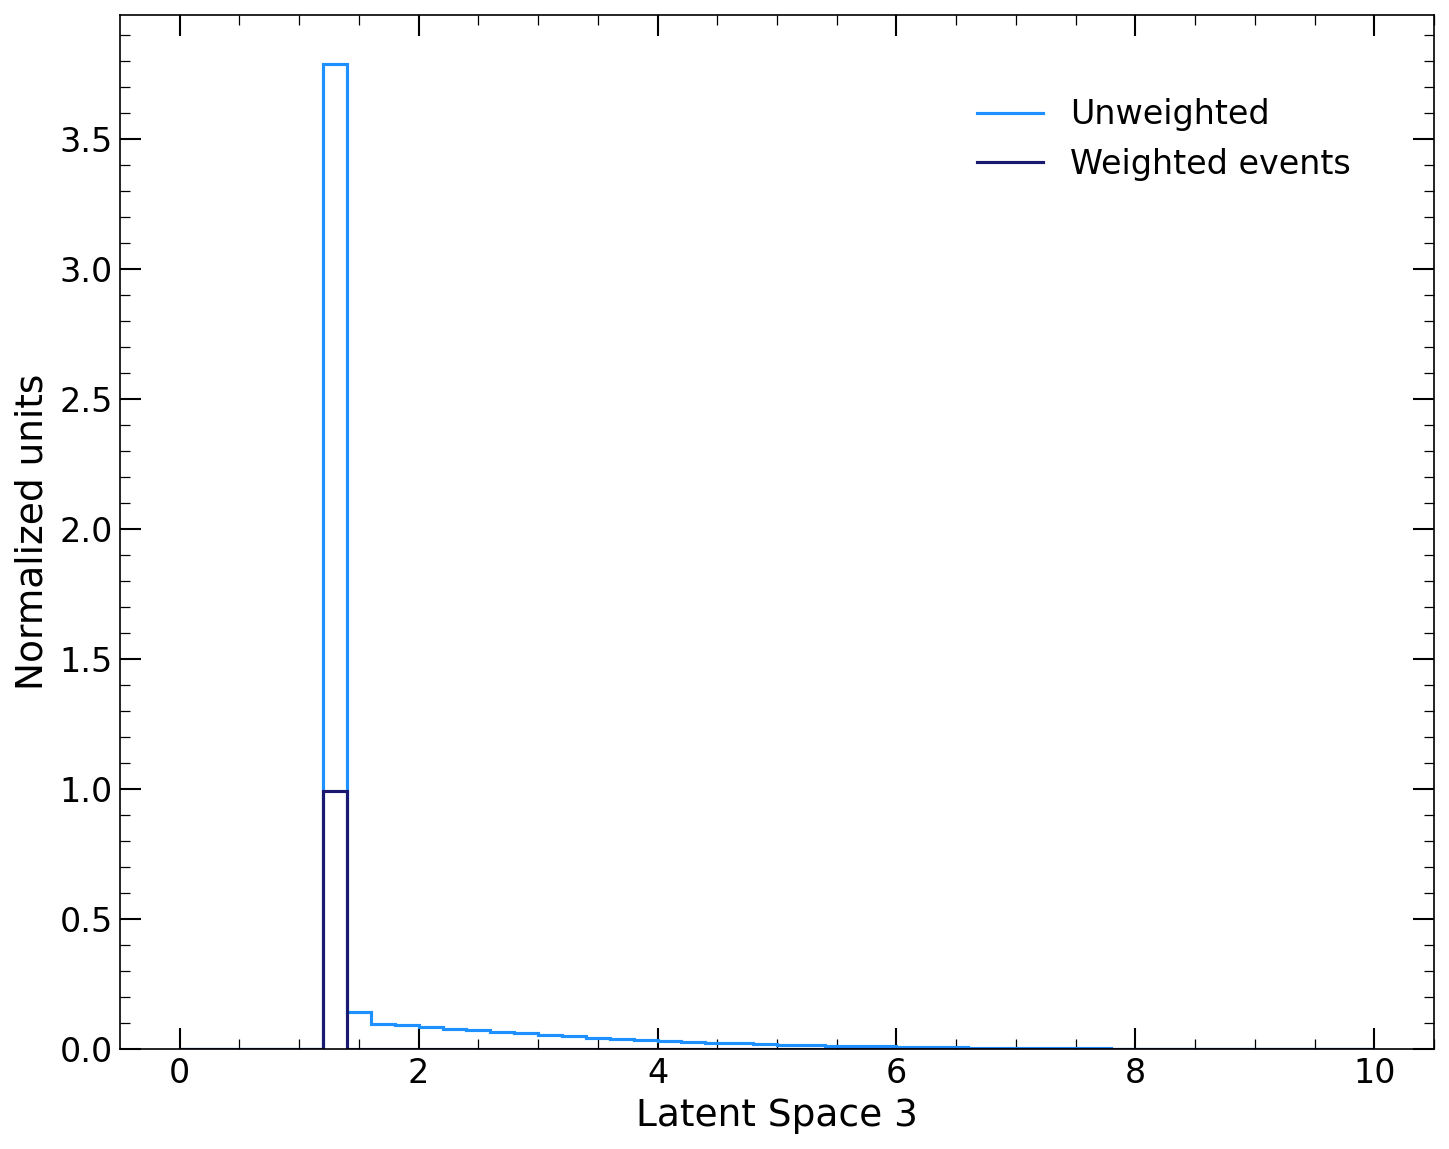

In [81]:
pls.plot_latent_space_1D(dataframes, 'EB_test', 'LS3', 'Latent Space 3', x_max=10, nbins=50)

Text(0, 0.5, 'Events')

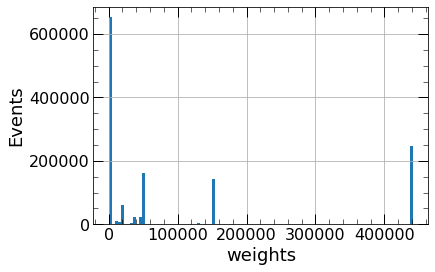

In [78]:
# Plot a quick histo on the weights for EB_test
fig, ax = plt.subplots()
dataframes['EB_test']['weights'].hist(ax=ax, bins=100)
# ax.set_yscale('log')
ax.set_xlabel('weights')
ax.set_ylabel('Events')


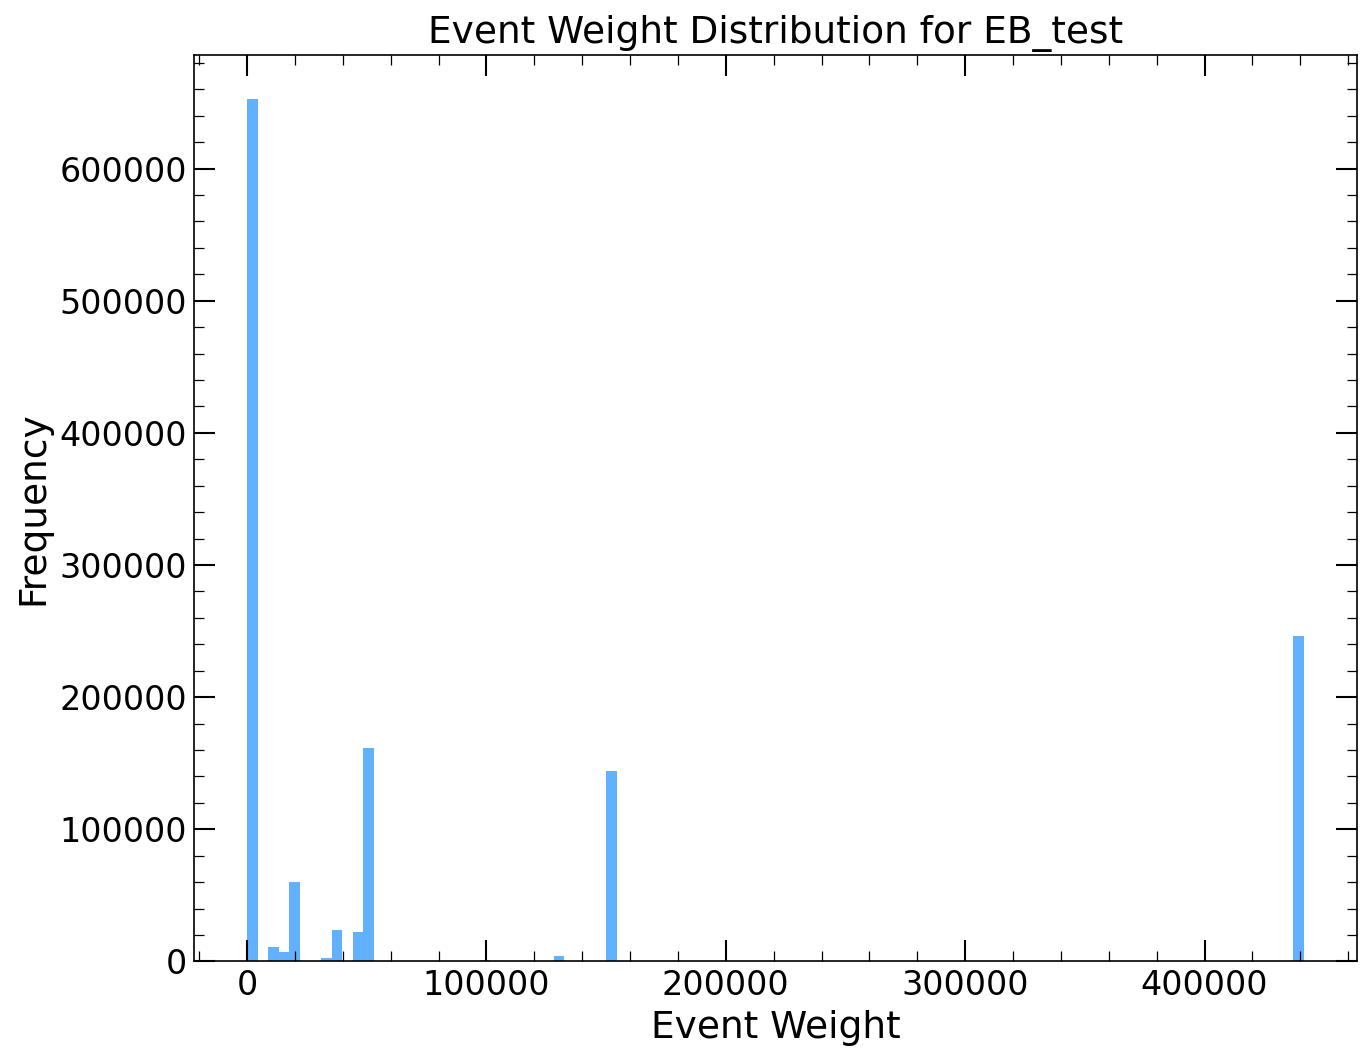

(<Figure size 1500x1200 with 1 Axes>,
 <AxesSubplot: title={'center': 'Event Weight Distribution for EB_test'}, xlabel='Event Weight', ylabel='Frequency'>)

In [84]:
di.plot_event_weights(dataframes, 'EB_test')